## Initial setup
This notebook has the analysis validation of the third regime using changes on base prices from different technologies.


In [56]:

'''
By Angela M. Rojas A. <angelara@student.unimelb.edu.au>

Created on 2 March 2021

'''
import sys
import os

sys.path.append(r'C:\Users\angel\Documents\GitHub\gr4sp\experiments\EMAworkbench')

sys.path.append(r'../')

#from ema_workbench.analysis.plotting_util import BOXPLOT, KDE, VIOLIN
# from ema_workbench.analysis.plotting import envelopes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import seaborn as sns

# from ema_workbench.analysis import prim
#import pareto
import os
import glob
import numpy as np
import pandas as pd
import os
import glob
# from matplotlib.pyplot import figure
# from matplotlib.legend_handler import HandlerLine2D
import statistics
import matplotlib.patches as mpatches
from graphformat import *

includePlots = True

In [1]:
import sys
import os

sys.path.append(r'C:\Users\angel\Documents\GitHub\gr4sp\experiments\EMAworkbench')

sys.path.append(r'C:\Users\angel\Documents\GitHub\gr4sp\experiments')

import statistics
import datetime as DT
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.dates as mdates
import seaborn as sns
# sns.set_style("whitegrid") 

import os
import glob
import numpy as np
import pandas as pd
import os
import glob
# plt.rcParams['text.usetex'] = True
# import matplotlib
# matplotlib.rcParams['mathtext.fontset'] = 'stix'
# matplotlib.rcParams['font.family'] = 'STIXGeneral'

plt.rcParams.update({'text.usetex': True, 'font.family': 'serif', 'axes.labelsize': 10, 'font.size': 10, 'legend.fontsize': 8, 'xtick.labelsize': 8, 'ytick.labelsize': 8})

includePlots = True

## Load Historical data for vaildation 
The following files include historic data on GHGE, tariffs and wholesale prices for validation.



### GHGE Historic

The key role of decarbonising the electricity sector in Victoria: The electricity sector in Victoria accounted for more than half of emissions in 2016. After the retirement of Hazelwood, this contribution still sited at 42% of the state's emissions. At the validation date (2020), historic emissions data for the electricity sector in Victoria is only available until 2017. 2018 number has been assumed to be 2017 (56.1) value minus a net reduction of 11.8 MtCO2-e given the retirement of Hazelwood in 2017.
Sources of data:
- https://engage.vic.gov.au/climate-change-reducing-victorias-greenhouse-gas-emissions
- https://www.climatechange.vic.gov.au/information-and-resources/greenhouse-gas-emissions-in-victoria
- https://www.climatechange.vic.gov.au/__data/assets/pdf_file/0033/395079/Victorian-Greenhouse-Gas-Emissions-Report-2018.pdf
- https://www.climatechange.vic.gov.au/__data/assets/pdf_file/0016/443014/Victorian-Greenhouse-Gas-Emissions-Report-2019.pdf

In [2]:
# CSV is built based on the information available in the previous sources 
historic_emissions_df = pd.read_csv(r'/home/XXX/Repositories/gr4sp/experiments/simulationData/19902018_historic_emissions_Vic.csv', index_col='Time (Year)')
historic_emissions_df.head(10)

,Hist_GHGE_MtCO2e
Time (Year),
1990,44.2
1991,46.3
1992,47.5
1993,45.3
1994,45.5
1995,47.8
1996,49.9
1997,52.6
1998,59.2


### Wholesale historic
Wholesale data can be found since 2005 in a monthly basis. Therefore, the monthly summary report is used for this validation. 
Sources of data:
- https://opennem.org.au/energy/vic1/

In [3]:
historic_wholesale_df = pd.read_csv(r'/home/XXX/Repositories/gr4sp/experiments/simulationData/2005_2020_OpenNemDataV1.csv', index_col='Time (Month)')
historic_wholesale_df.index = pd.to_datetime(historic_wholesale_df.index)

historic_wholesale_df.head(5)

,Temperature - C,Solar (Rooftop) Market Value - $,Solar (Rooftop) - GWh,Solar (Utility) Market Value - $,Solar (Utility) - GWh,Wind Market Value - $,Wind - GWh,Hydro Market Value - $,Hydro - GWh,Battery (Discharging) Market Value - $,...,Wind Market Value - $/MWh,Hydro Market Value - $/MWh,Battery (Discharging) Market Value - $/MWh,Gas (OCGT) Market Value - $/MWh,Gas (Steam) Market Value - $/MWh,Brown Coal Market Value - $/MWh,Imports Market Value - $/MWh,Exports Market Value - $/MWh,Volume Weighted Price (Historic) - $/MWh,Imports % from wholesale price
Time (Month),,,,,,,,,,,,,,,,,,,,,
2005-04-01,NaN,0.0,0.0,0.0,0.0,0.0,0.0,11848263.30,304.50,0.0,...,0.0,38.910553,0.0,44.023585,39.220646,30.605720,38.289921,-19.009200,31.809904,20%
2005-05-01,NaN,0.0,0.0,0.0,0.0,0.0,0.0,8161908.91,260.01,0.0,...,0.0,31.390750,0.0,35.260919,35.709309,24.667570,31.791585,-18.044240,25.330109,26%
2005-06-01,NaN,0.0,0.0,0.0,0.0,0.0,0.0,6597447.23,200.71,0.0,...,0.0,32.870546,0.0,50.142422,37.533559,23.616642,30.781600,-17.572286,24.249596,27%
2005-07-01,NaN,0.0,0.0,0.0,0.0,0.0,0.0,7421383.61,182.63,0.0,...,0.0,40.636169,0.0,56.781103,39.030981,26.668752,32.787615,-17.823924,27.651352,19%
2005-08-01,NaN,0.0,0.0,0.0,0.0,0.0,0.0,10855283.83,207.39,0.0,...,0.0,52.342369,0.0,98.739498,60.657385,30.161182,39.640099,-16.523324,32.022126,24%


### Tariffs historic

Different sources where used to construct a historic dataset of average electricity tariffs.
- Historic data found in the [ACCC report](https://www.accc.gov.au/system/files/Victorian%20Electricity%20Distribution%20Networks.pdf) from 2017. This data is from a household in VIC that use 4000 KWh/year, has gas water heating. The report has data for the years 1995, 2001, 2002, and from 2007 to 2017. But data is used from 2001. Since the data is given as total bill per year in /$, the price per KWh is computed as (AnnualBill/4000KWh)*100, to get the value in c/kWh.
- [St. Vinnies historic data](https://www.vinnies.org.au/page/Our_Impact/Incomes_Support_Cost_of_Living/Energy/VIC/) on tariffs per retailer and distribution area. This data has been collected since 2010, every quarter of the year. I used the ‘first block’ charges to calculate the average charge of usage in c/KWh. 

Prices from the reports and data sources are adjusted to 2019 values as simulatied tariffs are presented in real terms for the base year of 2019.


In [4]:
# historic average tariffs in c/kWh (real 2019) filtered from reports
yearly_historic_tariffs = pd.read_csv(r'/home/XXX/Repositories/gr4sp/experiments/simulationData/2001to2019_historicTariffs.csv', index_col='Time (Year)')
yearly_historic_tariffs.head(10)

,St Vinnies Historic c/kWh (2019),Historic price from review c/KWh (2019)
Time (Year),,
2001,NaN,27.32
2002,NaN,27.03
2003,NaN,NaN
2004,NaN,NaN
2005,NaN,NaN
2006,NaN,NaN
2007,NaN,23.38
2008,NaN,25.55
2009,NaN,27.74


## Load the results
These results are a tuple of one data frame with the changes on each input variable, and a dictionary with the outputs. 

In [5]:
freqs = [0.5,1,2,3,4,6,8,12,24]
# freqs = [ 0.5,6,8,12,24]

freq_dict = {}
for i in freqs:
    if i != 0.5:
        with open(f"../../{i}hourKey.txt",'r') as file:
            freq_dict[i] = file.read()
        
freq_month = {}
freq_year = {}


a_month_file = "/home/XXX/Documents/NominalSimDataMonthlySummary_30min.csv"

a_year_file = "/home/XXX/Documents/NominalSimDataYearSummary_30min.csv"

freq_month[0.5] = pd.read_csv(a_month_file, index_col = 0)
freq_year[0.5] = pd.read_csv(a_year_file, index_col = 0)


for i,j in freq_dict.items():
    freq_month[i] = pd.read_csv(f"../../csv/Nominal/NominalSimDataMonthlySummary_seed_{j}.csv", index_col = 0)
    freq_year[i] = pd.read_csv(f"../../csv/Nominal/NominalSimDataYearSummary_seed_{j}.csv", index_col = 0)
    




In [6]:
# from ema_workbench import load_results

# #results = load_results(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/simulationData/gr4sp_EET3Regime2021-Mar-01.tar.gz')
# #results = load_results(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/simulationData/gr4sp_SOBOL-HypoPast-2021-Jan-20.tar.gz')
# results = load_results(r'C:/Users/angel/Documents/GitHub/gr4sp/experiments/simulationData/gr4sp_SOBOLhypopast2021-Mar-03_includ_wholesale_month.tar.gz')


In [7]:
# experiments, outcomes = results

# # Create a temporary copy of dictionary, with Outcomes Year
# outcomesYear = dict(outcomes)

# keysToRemove = [] 
# # Iterate over the temporary dictionary and delete corresponding key from original dictionary
# for (key, value) in outcomesYear.items() :
#     if 'Month' in key:
#         keysToRemove.append(key)
        
# for k in keysToRemove:        
#     del outcomesYear[k]   
    
        

Code to remove a Nan experiment if existent

Run this code to find the experiment that needs to be removed:

```python
	outcome_df = dict()
	for k in outcomes.keys():
	     outcome_df[k] = pd.DataFrame.from_dict(outcomes[k])
	    
	
	for k in outcomes.keys():
	    print(outcome_df[k][outcome_df[k].isna().any(axis=1)])

```

and then use the ``id`` of the experiment and remove it with the code below

In [8]:
# outcomes_wo_nan = {}
# for k in outcomes.keys():
#     l1 = outcomes[k][0:41357]
#     l2 = outcomes[k][41357+1:41379]
#     l3 = outcomes[k][41379+1:]
#     outcomes_wo_nan[k] = np.concatenate((l1,l2,l3))
# outcomes = outcomes_wo_nan


In [9]:
# experiments.describe()

In [10]:
# bau_scenario_id = max(experiments['scenario']) + 1

# new_row = pd.DataFrame({'annualCpi': 0.0233, 'annualInflation': 0.033, 'nameplateCapacityChangeBrownCoal': 0,
#        'nameplateCapacityChangeWater': 0,'nameplateCapacityChangeOcgt': 0, 'consumption': 0, 'energyEfficiency': 0,
#        'generationRolloutPeriod':1, 'generatorRetirement':0,
#        'includePublicallyAnnouncedGen':0, 'learningCurve':0.05,
#        'nonScheduleGenSpotMarket': 10, 'nonScheduleMinCapMarketGen':0.1,
#        'priceChangePercentageBrownCoal':0, 'priceChangePercentageOcgt':0,
#        'priceChangePercentageWater':0, 'priceChangePercentageWind':0, 'rooftopPV':7,
#        'domesticConsumptionPercentage':0,
#        'scheduleMinCapMarketGen':30, 'semiScheduleGenSpotMarket':8,
#        'semiScheduleMinCapMarketGen':30, 'solarUptake':0,
#        'technologicalImprovement':0.01, 'wholesaleTariffContribution':28.37, 'scenario': bau_scenario_id,
#        'policy': "None", 'model': 'Gr4sp'}, index =[0]) 
# # simply concatenate both dataframes 
# experiments = pd.concat([experiments,new_row],sort=True).reset_index(drop = True) 

# # rename none in policy column into constant value 0. PRIM fails otherwise.
# if "None" in experiments["policy"].unique():
#     experiments["policy"] = experiments["policy"].replace("None",int(0))

In [11]:
#Results for BAU were generated with the 'light' setting in the model.
bau_results_df = pd.read_csv('/home/XXX/Documents/NominalSimDataYearSummary_30min.csv', index_col='Time (Year)')
bau_results_df.head()

monthly_bau_results_df = pd.read_csv(r'/home/XXX/Documents/NominalSimDataMonthlySummary_30min.csv', index_col='Time (Month)')

In [12]:
# seed_bau = bau_scenario_id + 1
# #outcomes['primaryWholesalePriceYear'] = outcomes['wholesalePriceYear']
# #outcomes['primaryWholesalePriceMonth'] = outcomes['wholesalePriceMonth']


# outcomes['TIMEMonth'] = np.append(outcomes['TIMEMonth'],
#                                           [monthly_bau_results_df.index], axis=0)
# outcomes['primaryWholesalePriceMonth'] = np.append(outcomes['primaryWholesalePriceMonth'],
#                                                    [monthly_bau_results_df['Primary Wholesale ($/MWh)'].values], axis=0)

# outcomes['TIMEYear'] = np.append(outcomes['TIMEYear'],
#                                           [bau_results_df.index], axis=0)
# outcomes['consumptionYear'] = np.append(outcomes['consumptionYear'],
#                                                  [bau_results_df['Consumption (KWh) per household'].values], axis=0)
# outcomes['tariffsYear'] = np.append(outcomes['tariffsYear'],
#                                                  [bau_results_df['Avg Tariff (c/KWh) per household'].values], axis=0)
# outcomes['primaryWholesalePriceYear'] = np.append(outcomes['primaryWholesalePriceYear'],
#                                                  [bau_results_df['Primary Wholesale ($/MWh)'].values], axis=0)
# outcomes['GHGYear'] = np.append(outcomes['GHGYear'],
#                                                  [bau_results_df['GHG Emissions (tCO2-e) per household'].values], axis=0)
# outcomes['numConsumersYear'] = np.append(outcomes['numConsumersYear'],
#                                                  [bau_results_df['Number of Domestic Consumers (households)'].values], axis=0)
# outcomes['primarySpotProductionYear'] = np.append(outcomes['primarySpotProductionYear'],
#                                                  [bau_results_df['System Production Primary Spot'].values], axis=0)
# outcomes['secondarySpotProductionYear'] = np.append(outcomes['secondarySpotProductionYear'],
#                                                  [bau_results_df['System Production Secondary Spot'].values], axis=0)
# outcomes['offSpotProductionYear'] = np.append(outcomes['offSpotProductionYear'],
#                                                  [bau_results_df['System Production Off Spot'].values], axis=0)
# outcomes['renewableContributionYear'] = np.append(outcomes['renewableContributionYear'],
#                                                  [bau_results_df['Percentage Renewable Production'].values], axis=0)
# outcomes['rooftopPVProductionYear'] = np.append(outcomes['rooftopPVProductionYear'],
#                                                  [bau_results_df['System Production Rooftop PV'].values], axis=0)
# outcomes['coalProductionYear'] = np.append(outcomes['coalProductionYear'],
#                                                  [bau_results_df['System Production Coal'].values], axis=0)
# outcomes['windProductionYear'] = np.append(outcomes['windProductionYear'],
#                                                  [bau_results_df['System Production Wind'].values], axis=0)
# outcomes['gasProductionYear'] = np.append(outcomes['gasProductionYear'],
#                                                  [bau_results_df['System Production Gas'].values], axis=0)
# outcomes['solarProductionYear'] = np.append(outcomes['solarProductionYear'],
#                                                  [bau_results_df['System Production Solar'].values], axis=0)   
# outcomes['waterProductionYear'] = np.append(outcomes['waterProductionYear'],
#                                                  [bau_results_df['System Production Water'].values], axis=0)
# outcomes['BatteryProductionYear'] = np.append(outcomes['BatteryProductionYear'],
#                                                  [bau_results_df['System Production Battery'].values], axis=0)
# outcomes['numActorsYear'] = np.append(outcomes['numActorsYear'],
#                                                  [bau_results_df['Number of Active Actors'].values], axis=0)
# outcomes['primaryUnmetDemandMwh'] = np.append(outcomes['primaryUnmetDemandMwh'],
#                                                  [bau_results_df['Primary Total Unmet Demand (MWh)'].values], axis=0)
# outcomes['primaryUnmetDemandHours'] = np.append(outcomes['primaryUnmetDemandHours'],
#                                                  [bau_results_df['Primary Total Unmet Demand (Hours)'].values], axis=0)
# outcomes['primaryUnmetDemandDays'] = np.append(outcomes['primaryUnmetDemandDays'],
#                                                  [bau_results_df['Primary Total Unmet Demand (Days)'].values], axis=0)
# outcomes['primaryMaxUnmetDemandMwhPerHour'] = np.append(outcomes['primaryMaxUnmetDemandMwhPerHour'],
#                                                  [bau_results_df['Primary Max Unmet Demand Per Hour (MWh)'].values], axis=0)
# outcomes['secondaryUnmetDemandMwh'] = np.append(outcomes['secondaryUnmetDemandMwh'],
#                                                  [bau_results_df['Secondary Total Unmet Demand (MWh)'].values], axis=0)
# outcomes['secondaryUnmetDemandHours'] = np.append(outcomes['secondaryUnmetDemandHours'],
#                                                  [bau_results_df['Secondary Total Unmet Demand (Hours)'].values], axis=0)
# outcomes['secondaryUnmetDemandDays'] = np.append(outcomes['secondaryUnmetDemandDays'],
#                                                  [bau_results_df['Secondary Total Unmet Demand (Days)'].values], axis=0)
# outcomes['secondaryMaxUnmetDemandMwhPerHour'] = np.append(outcomes['secondaryMaxUnmetDemandMwhPerHour'],
#                                                  [bau_results_df['Secondary Max Unmet Demand Per Hour (MWh)'].values], axis=0)

# outcomes['seedExperimentCsv'] = np.append(outcomes['seedExperimentCsv'], [seed_bau], axis=0)


In [13]:
# outcomes_to_show = ['consumptionYear', 'tariffsYear', 'primaryWholesalePriceYear','primaryWholesalePriceMonth', 'GHGYear', 
#                     'numConsumersYear', 'primarySpotProductionYear', 'secondarySpotProductionYear', 
#                     'offSpotProductionYear', 'renewableContributionYear', 'rooftopPVProductionYear', 
#                     'coalProductionYear', 'waterProductionYear', 'windProductionYear', 'gasProductionYear', 
#                     'solarProductionYear', 'BatteryProductionYear', 'numActorsYear', 'primaryUnmetDemandMwh', 
#                     'primaryUnmetDemandHours', 'primaryUnmetDemandDays', 'primaryMaxUnmetDemandMwhPerHour', 
#                     'secondaryUnmetDemandMwh', 'secondaryUnmetDemandHours', 'secondaryUnmetDemandDays', 
#                     'secondaryMaxUnmetDemandMwhPerHour']

# # 23 levers/uncertainties selected after EET (last test July 2020)
# # 25 uncertainties selected aftet EET including change on domestic demand and unmet demand output (August 2020)
# uncertainties = experiments.columns[:-3]

# #from startYear
# startYear = 1998
# startYearShift = (startYear - 1998)

# #time = outcomes['TIMEYear'][0, startYearShift:]
# time = outcomes['TIMEYear'][0, startYearShift:-32]

# #points_of_interest = [*range(2020,2051,10)] 
# #points_of_interest = [ x - startYear for x in points_of_interest]

# points_of_interest = [0,5,10,15,20]


# # Filter outcomes taking into account the startYear, and removing Seed Experiment info. 
# # Seed it is useful if I want to retrieve more info from the csv files, or redo the experiments with the
# # simulation parameters
# outcomes_filtered = {k:v[:, startYearShift:-32] for k,v in outcomes.items() if k != 'seedExperimentCsv'}

In [14]:
# ## Aggregate household data
ooi = 'GHGYear'
data_GHG_household = outcomes_filtered[ooi]

# """ Converts household data in tCO2e into total residential data in MtCO2e"""
data_GHG_residential = (data_GHG_household * outcomes_filtered['numConsumersYear']) / 1000000.0
data_GHG_residential_bau = (bau_results_df['GHG Emissions (tCO2-e) per household'] * bau_results_df['Number of Domestic Consumers (households)']) / 1000000.0

# """ Applies scaling factor used in simulation, so that data represents total emissions, not only residential (30%)"""
data_GHG_total = data_GHG_residential / 0.3
data_GHG_total_bau = data_GHG_residential_bau / 0.3


# """Overwrite GHG with the data of interest"""
# outcomes_filtered[ooi] = data_GHG_total
# bau_results_df[ooi] = data_GHG_total_bau

NameError: name 'outcomes_filtered' is not defined

In [15]:
# #Subset of levers/uncertainties
# #selected_levers = list(['rooftopPV', 'annualCpi','capacityFactorChangeBrownCoal','capacityFactorChangeWater','semiScheduleMinCapMarketGen'])    
# selected_uncertainties = uncertainties

# ooi = 'GHGYear'

# data = outcomes_filtered[ooi]


# num_exp = len(data)
# out_avg_ooi = np.zeros(num_exp)

# for i in range(num_exp):
#     out_avg_ooi[i] = data[i].mean()

# exp = pd.DataFrame(experiments)

# exp = exp.loc[ :, selected_uncertainties] 

## Envelopes

### GHGE

#### Best seeds according to MAD, RMSE, Euclidian metrics

In [16]:
# b = 1.4826

abs_difference_list = list()
historic_emissions = historic_emissions_df[historic_emissions_df.index > 1997]['Hist_GHGE_MtCO2e']
# bau_results_df_GHGE = bau_results_df['GHGYear'].iloc[:-32]

# abs_difference_list_hist_all = abs(historic_emissions.values - outcomes_filtered['GHGYear'])
# abs_difference_list_hist_bau = abs(historic_emissions.values - bau_results_df_GHGE)


# mad_best = np.median(abs_difference_list_hist_all,axis=1)
# print(f'Best possible MAD for {ooi} is {np.min(mad_best):.2f}, experiment index {np.argmin(mad_best)} vs. the MAD of Nominal {mad_best[-1]:.2f}')


# #Root-mean square error
# rms = np.sqrt(np.mean(np.square(historic_emissions.values - outcomes_filtered['GHGYear']),axis=1))
# print(f'Best possible RMS for {ooi} is {np.min(rms):.2f}, experiment index {np.argmin(rms)} vs. the RMS of Nominal {rms[-1]:.2f}')

# #Euclidian distance
# eucl = dist = np.linalg.norm(historic_emissions.values - outcomes_filtered['GHGYear'],axis=1)
# eucl_similar = 1/1+eucl[-1]
# print(f'Best possible Euclidean Distance for {ooi} is {np.min(eucl):.2f}, experiment index {np.argmin(eucl)} vs. the Euclidean Distance of Nominal {eucl[-1]:.2f}')

# #eucl_similar

# # print(f'RMS for {ooi} of best experiment for Wholesale Price (74035) {rms[74035]:.2f}')



#### Plots

In [17]:
# data_GHG_residential = (data_GHG_household * outcomes_filtered['numConsumersYear']) / 1000000.0
# data_GHG_residential_bau = (bau_results_df['GHG Emissions (tCO2-e) per household'] * bau_results_df['Number of Domestic Consumers (households)']) / 1000000.0

""" Applies scaling factor used in simulation, so that data represents total emissions, not only residential (30%)"""
# data_GHG_total = data_GHG_residential / 0.3
# data_GHG_total_bau = data_GHG_residential_bau / 0.3


' Applies scaling factor used in simulation, so that data represents total emissions, not only residential (30%)'

In [18]:
#change fig size
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

#compute STD and MEAN
# ghgeSTD = np.std(outcomes_filtered['GHGYeaar'],axis=0)
# ghge2STD = 2*np.std(outcomes_filtered['GHGYear'],axis=0)

# ghgeMean = np.mean(outcomes_filtered['GHGYear'],axis=0)
# ghgeNominal = outcomes_filtered[ooi][-1]
ghgeHistoric = historic_emissions_df[historic_emissions_df.index > 1997]['Hist_GHGE_MtCO2e'].values

#PLOT MEAN
#lineMean, = plt.plot(time,ghgeMean, 'b-', label = 'Mean')

#PLOT STD and 2STD
# plt.fill_between(x=time,y1=ghgeNominal - ghgeSTD, y2=ghgeNominal + ghgeSTD,
#                  color='gray', alpha=0.2)
# plt.fill_between(x=time,y1=ghgeNominal - ghge2STD, y2=ghgeNominal + ghge2STD,
#                  color='darkgray', alpha=0.2)

#PLOT Historic
lineHist, = plt.plot([1998 + i for i in range(len(ghgeHistoric))], ghgeHistoric, 'g--', label = 'Historic')

#PLOT Nominal
for i in freq_year.keys():
    ghg_data = freq_year[i].loc[:2018]['GHG Emissions (tCO2-e) per household'] * freq_year[i].loc[:2018]['Number of Domestic Consumers (households)'] / 1000000.0
    ghg_data /=  0.3

    if i == 0.5:    
        plt.plot( [1998 + i for i in range(len(ghgeHistoric))], ghg_data, label = f'GHGE - Hour {i}', alpha=0.4, color='red')
    else:
        plt.plot( [1998 + i for i in range(len(ghgeHistoric))], ghg_data, label = f'GHGE - Hour {i}', alpha=0.4)
        
        
        #     else:
#         plt.plot( yearly_dates,f'Simulated_GHGE_VIC (MtCO2e) {i}', data=historic_and_simul_emissions_df,
#              linewidth=4, label = f'GHGE - Simulated (STLM+CSI+MS) Hour {i}')


# lineNominal, = plt.plot(time,ghgeNominal, 'r-', label = 'Nominal')

# lightgrey_patch = mpatches.Patch(color='lightgray', label='+/- 2\u03C3')
# darkgrey_patch = mpatches.Patch(color='darkgray', label='+/- 1\u03C3')


#PLOT legend, and title

plt.legend()
axes = plt.gca()
axes.set_ylim([0,120])
ylabel = axes.set_ylabel('$MtCO_2e$')
#plt.suptitle("{}".format(ooi), fontsize=15)

NameError: name 'figure' is not defined

### Summary Statistics

,0.5,1.0,2.0,3.0,4.0,6.0,8.0,12.0,24.0
mean_ae,2.527453,2.387518,2.355778,2.355175,2.354571,2.353363,2.352155,2.349740,2.342727
median_ae,2.043580,1.436027,1.704608,1.704654,1.704699,1.704788,1.704876,1.705049,1.705542
rmse,3.438929,3.369487,3.386545,3.386425,3.386320,3.386151,3.386037,3.385973,3.387105


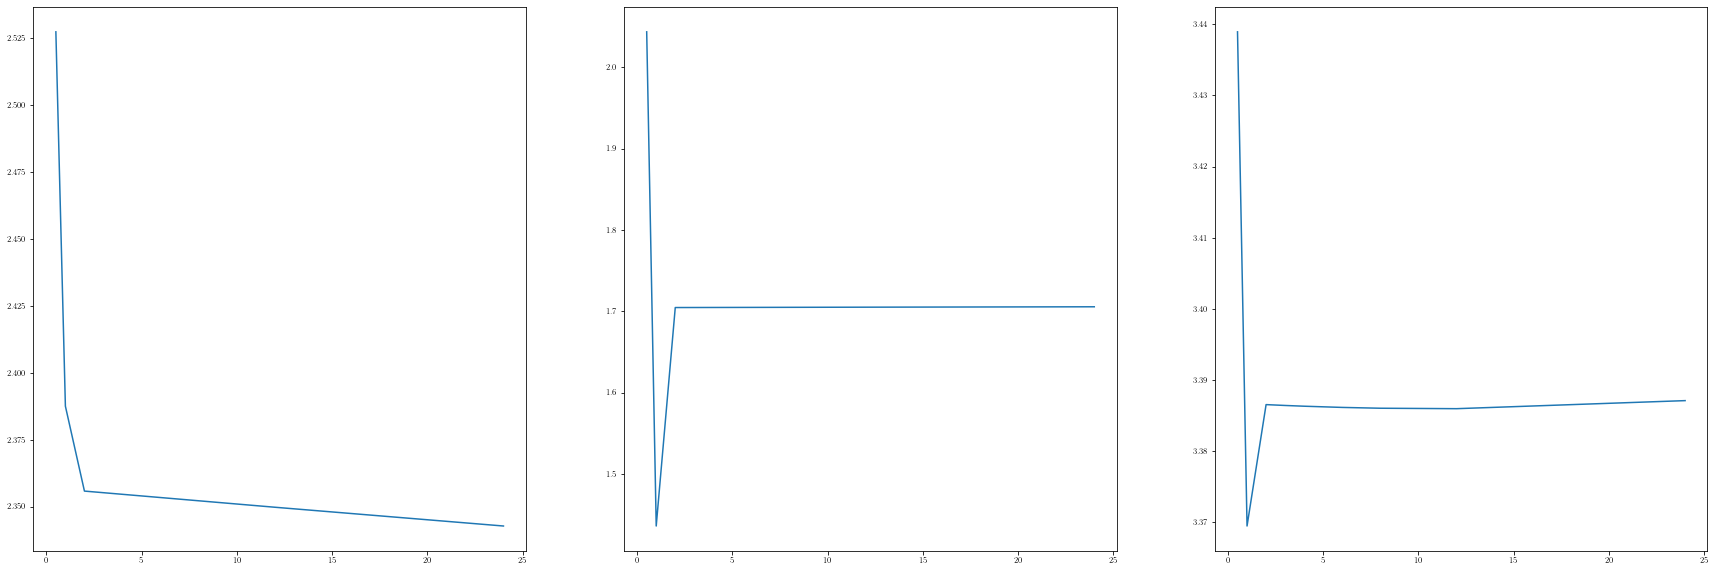

In [19]:
from sklearn.metrics import r2_score


ghg_data_df = {}
for year in freq_year.keys():

    curr = {}

    abs_difference_list = list()
    diff_list = []
    for i in historic_emissions_df[historic_emissions_df.index > 1997].index:
        
        simulated_value = freq_year[year].loc[i]['GHG Emissions (tCO2-e) per household'] * freq_year[year].loc[i]['Number of Domestic Consumers (households)'] / 1000000.0 / 0.3
        hist_value = historic_emissions_df[historic_emissions_df.index > 1997].loc[i]['Hist_GHGE_MtCO2e']
        
        diff_list.append(simulated_value - hist_value)
        
        diff = abs(simulated_value - hist_value)
        abs_difference_list.append(diff)
        
        
        
    curr['mean_ae'] = np.mean(abs_difference_list)
    curr['median_ae'] = statistics.median(abs_difference_list)
    curr['rmse'] = (np.mean(list(map(lambda a: a**2, diff_list))))**0.5
    
        
    ghg_data_df[year] = curr
        
# mad = statistics.median(abs_difference_list)
# std = mad*b
# print(f"Simulated results are {mad.round(decimals=2)} MTCO2-e (MAD) away from historic data")
# print(f"Simulated results have a standard deviation of {std.round(decimals=2)} MTCO2-e from historic data")

ghg_data_df = pd.DataFrame(ghg_data_df)
display(ghg_data_df)

fig, ax = plt.subplots(1,3, figsize=(30,10))
for i,j in enumerate(ghg_data_df.index):
    ax[i].plot(freqs, ghg_data_df.loc[j])
plt.show()

In [20]:
# withinSTD = ((ghgeHistoric < ghgeNominal + ghgeSTD) & (ghgeHistoric > ghgeNominal - ghgeSTD)).sum()
# numCases = len(ghgeHistoric)
# withinSTDpercentage = (withinSTD/numCases) * 100.0
# print(f'{withinSTD} cases within the STD range out of {numCases}, which makes {withinSTDpercentage}% of total cases')

# withinSTD = ((ghgeHistoric < ghgeNominal + 2*ghgeSTD) & (ghgeHistoric > ghgeNominal - 2*ghgeSTD)).sum()
# numCases = len(ghgeHistoric)
# withinSTDpercentage = (withinSTD/numCases) * 100.0
# print(f'{withinSTD} cases within the 2STD range out of {numCases}, which makes {withinSTDpercentage}% of total cases')

In [21]:
# from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
# from EMAworkbench.ema_workbench.analysis.plotting_util import Density 

# fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
#                                  points_in_time=[0,5,10,15,20], density = Density.HIST, grouping_specifiers=None,
#                                  titles={ooi}, ylabels={ooi: "MtCO2e"}, legend=True,
#                                  fill=True, plot_type=PlotType.ENVELOPE)

# #Change x labels to years
# ax_env[ooi]['main plot'].set_xticklabels([startYear + x / 10.0 for x in range(0,len(time)*10,25)])

# #Add BAU in the plot with a red line
# ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][-1], 'r-')

# ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][63738], 'y-')
# ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][27332], 'k-')
# ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][25713], 'm-')

 
# ax_env[ooi]['main plot'].plot(historic_emissions_df[historic_emissions_df.index > 1997]['Hist_GHGE_MtCO2e'].values, 'g--')



# ## Add historic figures
# ax_env

# ## Show labels
# # labels = ax_env['F']['main plot'].get_xticklabels()
# # for l in labels:
# #     print (l.get_text)

# fig[0].suptitle("{}".format(ooi), fontsize=15)
# fig[0].set_size_inches(18.5, 10.5)
# #plt.legend()

# plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_3Regime_envelope_density_%s'%(ooi)),
#                 dpi=300, bbox_inches='tight')


### Wholesale prices (primary market)

In [22]:
#from startYear
startYear_wholesale = 2005
startYearShift_wholesale = (startYear_wholesale - 1998)

#time = outcomes['TIMEYear'][0, startYearShift:]
# time_wholesale = outcomes['TIMEYear'][0, startYearShift_wholesale:-30]

#points_of_interest = [*range(2020,2051,10)] 
#points_of_interest = [ x - startYear for x in points_of_interest]

points_of_interest_wholesale = [0,5,10,15]


# Filter outcomes taking into account the startYear, and removing Seed Experiment info. 
# Seed it is useful if I want to retrieve more info from the csv files, or redo the experiments with the
# simulation parameters
# outcomes_filtered_wholesale = {k:v[:, startYearShift_wholesale:-30] for k,v in outcomes.items() if k != 'seedExperimentCsv'}

In [23]:
# # Subset Sobol levers
# #selected_levers = list(['rooftopPV','annualCpi', 'generationRolloutPeriod', 'generatorRetirement','capacityFactorChangeBrownCoal','semiScheduleMinCapMarketGen'])    

# select_uncertainties = uncertainties
# ooi = 'primaryWholesalePriceYear'

# num_exp = len(data)
# out_avg_ooi = np.zeros(num_exp)

# for i in range(num_exp):
#     out_avg_ooi[i] = data[i].mean()

# exp = pd.DataFrame(experiments)

# exp = exp.loc[ :, select_uncertainties] 



#### Best seeds according to MAD, RMSE, Euclidian distance metrics

In [24]:
# b = 1.4826

# abs_difference_list = list()
# historic_wholesale_values = historic_wholesale_df['Volume Weighted Price (Historic) - $/MWh'].resample('Y').mean().values
# abs_difference_list = abs(historic_wholesale_values - outcomes_filtered_wholesale[ooi])

# mad = np.median(abs_difference_list,axis=1)
# print(f'Best possible MAD for {ooi} is {np.min(mad):.2f}, experiment index {np.argmin(mad)} vs. the MAD of Nominal {mad[-1]:.2f}')

# #sumad = np.sum(abs_difference_list,axis=1)
# #print(f'Best possible SumAD for {ooi} is {np.min(sumad)}, experiment index {np.argmin(sumad)} vs. the SumAD of BAU {sumad[-1]}')

# rms = np.sqrt(np.mean(np.square(historic_wholesale_values - outcomes_filtered_wholesale[ooi]),axis=1))
# print(f'Best possible RMS for {ooi} is {np.min(rms):.2f}, experiment index {np.argmin(rms)} vs. the RMS of Nominal {rms[-1]:.2f}')

# #Euclidian distance
# eucl = dist = np.linalg.norm(historic_wholesale_values -  outcomes_filtered_wholesale[ooi],axis=1)

# print(f'Best possible Euclidean Distance for {ooi} is {np.min(eucl):.2f}, experiment index {np.argmin(eucl)} vs. the Euclidean Distance of Nominal {eucl[-1]:.2f}')

# print(f'RMS for {ooi} of best experiment for GHGE (25713) {rms[25713]}')


#### Plots

In [25]:
#change fig size
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

#compute STD and MEAN
# wholesaleSTD = np.std(outcomes_filtered_wholesale['primaryWholesalePriceYear'],axis=0)
# wholesale2STD = 2*np.std(outcomes_filtered_wholesale['primaryWholesalePriceYear'],axis=0)

# wholesaleMean = np.mean(outcomes_filtered_wholesale['primaryWholesalePriceYear'],axis=0)
# wholesaleNominal = outcomes_filtered_wholesale[ooi][-1]

#PLOT MEAN
#lineMean, = plt.plot(time_wholesale, wholesaleMean, 'b-', label = 'Mean')

#PLOT STD
# plt.fill_between(x=time_wholesale, y1=wholesaleNominal - wholesaleSTD, y2=wholesaleNominal + wholesaleSTD,
#                  color='gray', alpha=0.2)
# plt.fill_between(x=time_wholesale, y1=wholesaleNominal - wholesale2STD, y2=wholesaleNominal + wholesale2STD,
#                  color='darkgray', alpha=0.2)

time_wholesale = range(2005, 2021)

historic_wholesale_values = historic_wholesale_df['Volume Weighted Price (Historic) - $/MWh'].resample('Y').mean()

#PLOT Historic
lineHist, = plt.plot(time_wholesale, historic_wholesale_values, 'g--', label = 'Historic')

#PLOT Nominal
for i in freq_year.keys():
    whole_y_data = freq_year[i].loc[2005:2020]['Primary Wholesale ($/MWh)']

    if i == 0.5:    
        plt.plot(whole_y_data.index, whole_y_data, label = f'Wholesale Year - Hour {i}', alpha=0.4, color='red')
    else:
        plt.plot(whole_y_data.index, whole_y_data, label = f'Wholesale Year - Hour {i}', alpha=0.4)


# lightgrey_patch = mpatches.Patch(color='lightgray', label='+/- 2\u03C3')
# darkgrey_patch = mpatches.Patch(color='darkgray', label='+/- 1\u03C3')

#PLOT legend, and title
plt.legend()
plt.ylabel('$\MWh')

#plt.suptitle("{}".format(ooi), fontsize=15)

NameError: name 'figure' is not defined

### Summary Statistics

In [26]:
from sklearn.metrics import r2_score


whole_y_data_df = {}
for year in freq_year.keys():

    curr = {}

    abs_difference_list = list()
    diff_list = []
    for i in time_wholesale:
        
        simulated_value = freq_year[year].loc[i]['Primary Wholesale ($/MWh)']
        
        hist_value = historic_wholesale_values[i-2005]
        
        
        diff_list.append(simulated_value - hist_value)
        
        diff = abs(simulated_value - hist_value)
        abs_difference_list.append(diff)
        
        
        
    curr['mean_ae'] = np.mean(abs_difference_list)
    curr['median_ae'] = statistics.median(abs_difference_list)
    curr['rmse'] = (np.mean(list(map(lambda a: a**2, diff_list))))**0.5
    
        
    whole_y_data_df[year] = curr
        
# mad = statistics.median(abs_difference_list)
# std = mad*b
# print(f"Simulated results are {mad.round(decimals=2)} MTCO2-e (MAD) away from historic data")
# print(f"Simulated results have a standard deviation of {std.round(decimals=2)} MTCO2-e from historic data")

whole_y_data_df = pd.DataFrame(whole_y_data_df)
display(whole_y_data_df)

fig, ax = plt.subplots(1,3, figsize=(30,10))
for i,j in enumerate(whole_y_data_df.index):
    ax[i].plot(freqs, whole_y_data_df.loc[j])
plt.show()

NameError: name 'time_wholesale' is not defined

In [27]:
# withinSTD = ((historic_wholesale_values < wholesaleNominal + wholesaleSTD) & (historic_wholesale_values > wholesaleNominal - wholesaleSTD)).sum()
# numCases = len(historic_wholesale_values)
# withinSTDpercentage = (withinSTD/numCases) * 100.0
# print(f'{withinSTD} cases within the STD range out of {numCases}, which makes {withinSTDpercentage}% of total cases')

# within2STD = ((historic_wholesale_values < wholesaleNominal + wholesale2STD) & (historic_wholesale_values > wholesaleNominal - wholesale2STD)).sum()
# numCases = len(historic_wholesale_values)
# within2STDpercentage = (within2STD/numCases) * 100.0
# print(f'{within2STD} cases within the 2STD range out of {numCases}, which makes {within2STDpercentage}% of total cases')


#### Yearly STD applied to monthly data

In [28]:
# std_series = pd.Series(name='STD',data=wholesaleSTD,index=pd.to_datetime(historic_wholesale_df['Volume Weighted Price (Historic) - $/MWh'].resample('Y').mean().index))
# std_series = std_series.resample('MS').bfill()

In [29]:
# simul_data_wholesale_filtered = monthly_bau_results_df['Primary Wholesale ($/MWh)']
# simul_data_wholesale_filtered.index = pd.to_datetime(simul_data_wholesale_filtered.index)

# historic_wholesale_filtered = historic_wholesale_df["Volume Weighted Price (Historic) - $/MWh"]

# from functools import reduce

# historic_wholesale_list = [historic_wholesale_filtered, simul_data_wholesale_filtered, std_series]

# historic_and_simul_wholesale_df = reduce(lambda x, y: pd.merge(x, y, on = 'Time (Month)'), historic_wholesale_list)
# historic_and_simul_wholesale_df.head(10)


In [30]:
# plt.figure(figsize=(18,10))

# #plt.plot( 'Volume Weighted Price (Historic) - $/MWh', data=historic_and_simul_wholesale_df, marker='o', markerfacecolor='darkgoldenrod', markersize=8, color='burlywood', linewidth=4)
# #plt.plot( 'Wholesale ($/MWh)', data=historic_and_simul_wholesale_df, marker='o', markerfacecolor='steelblue', markersize=8, color='lightblue', linewidth=4)

# plt.plot( 'Primary Wholesale ($/MWh)', data=historic_and_simul_wholesale_df, color='r', linewidth=2, label='Wholesale Primary Spot Market - Simulated')
# plt.plot( 'Volume Weighted Price (Historic) - $/MWh', data=historic_and_simul_wholesale_df, color='g', linestyle='--', linewidth=2, label='Wholesale Primary Spot Market - Historic')

# #PLOT STD
# monthWholeSTD = historic_and_simul_wholesale_df['STD'].values
# monthWhole2STD = 2* historic_and_simul_wholesale_df['STD'].values

# monthNominalWhole = historic_and_simul_wholesale_df['Primary Wholesale ($/MWh)'].values
# monthHistoricWhole = historic_and_simul_wholesale_df['Volume Weighted Price (Historic) - $/MWh'].values

# plt.fill_between(x=historic_and_simul_wholesale_df.index, y1=monthNominalWhole - monthWholeSTD, y2=monthNominalWhole + monthWholeSTD,
#                  color='gray', alpha=0.2, label='+/- 2\u03C3')
# plt.fill_between(x=historic_and_simul_wholesale_df.index, y1=monthNominalWhole - monthWhole2STD, y2=monthNominalWhole + monthWhole2STD,
#                  color='darkgray', alpha=0.2, label='+/- 1\u03C3')


# plt.xlabel('Months', size = 16)
# plt.ylabel('$/MWh', size = 16)
# plt.xticks(size = 14)
# plt.yticks(size = 14)

# plt.legend(prop={'size':16})

In [31]:
# withinSTD = ((monthHistoricWhole < monthNominalWhole + monthWholeSTD) & (monthHistoricWhole > monthNominalWhole - monthWholeSTD)).sum()
# numCases = len(monthHistoricWhole)
# withinSTDpercentage = (withinSTD/numCases) * 100.0
# print(f'{withinSTD} cases within the STD range out of {numCases}, which makes {withinSTDpercentage}% of total cases')

# within2STD = ((monthHistoricWhole < monthNominalWhole + monthWhole2STD) & (monthHistoricWhole > monthNominalWhole - monthWhole2STD)).sum()
# numCases = len(monthHistoricWhole)
# within2STDpercentage = (within2STD/numCases) * 100.0
# print(f'{within2STD} cases within the 2STD range out of {numCases}, which makes {within2STDpercentage}% of total cases')


#### Monthly STD applied to monthly data

In [32]:
# #compute STD and MEAN
# wholesaleSTDmonth = np.std(outcomes_filtered_wholesale['primaryWholesalePriceMonth'],axis=0)
# wholesaleMeanMonth = np.mean(outcomes_filtered_wholesale['primaryWholesalePriceMonth'],axis=0)

In [33]:
# std_series = pd.Series(name='STD',data=wholesaleSTDmonth,index=pd.to_datetime(outcomes_filtered_wholesale['TIMEMonth'][0]))
# std_series = std_series.rename_axis('Time (Month)')
# simul_data_wholesale_filtered = monthly_bau_results_df['Primary Wholesale ($/MWh)']
# simul_data_wholesale_filtered.index = pd.to_datetime(simul_data_wholesale_filtered.index)

# historic_wholesale_filtered = historic_wholesale_df["Volume Weighted Price (Historic) - $/MWh"]

# from functools import reduce

# historic_wholesale_list = [historic_wholesale_filtered, simul_data_wholesale_filtered, std_series]

# historic_and_simul_wholesale_df = reduce(lambda x, y: pd.merge(x, y, on = 'Time (Month)'), historic_wholesale_list)
# historic_and_simul_wholesale_df.head(20)

In [34]:
# b = 1.4826

# abs_difference_list = list()
# historic_wholesale_values = historic_wholesale_filtered.values
# monthNominalWhole = historic_and_simul_wholesale_df['Primary Wholesale ($/MWh)'].values

# abs_difference_list = abs(historic_wholesale_values - monthNominalWhole)

# mad = np.median(abs_difference_list)
# print(f'The MAD of Nominal {mad:.2f}')

# #sumad = np.sum(abs_difference_list,axis=1)
# #print(f'Best possible SumAD for {ooi} is {np.min(sumad)}, experiment index {np.argmin(sumad)} vs. the SumAD of BAU {sumad[-1]}')

# rms = np.sqrt(np.mean(np.square(historic_wholesale_values - monthNominalWhole)))
# print(f'The RMS of Nominal {rms:.2f}')

# #Euclidian distance
# eucl = dist = np.linalg.norm(historic_wholesale_values -  monthNominalWhole)

# print(f'The Euclidean Distance of Nominal {eucl:.2f}')

In [35]:
plt.figure(figsize=(18,10))

#plt.plot( 'Volume Weighted Price (Historic) - $/MWh', data=historic_and_simul_wholesale_df, marker='o', markerfacecolor='darkgoldenrod', markersize=8, color='burlywood', linewidth=4)
#plt.plot( 'Wholesale ($/MWh)', data=historic_and_simul_wholesale_df, marker='o', markerfacecolor='steelblue', markersize=8, color='lightblue', linewidth=4)
historic_wholesale_values = historic_wholesale_df['Volume Weighted Price (Historic) - $/MWh']

plt.plot(historic_wholesale_values.index, historic_wholesale_values, color='black', linewidth=2, label='Wholesale Primary Spot Market - Simulated')
for i in freq_month.keys():
    
    whole_y_data = freq_month[i].loc['2005-04-01':'2020-06-01']['Primary Wholesale ($/MWh)']


    if i == 0.5:    
        plt.plot(historic_wholesale_values.index, whole_y_data, label = f'Wholesale Month - Hour {i}', color='red')
    else:
        plt.plot(historic_wholesale_values.index, whole_y_data, label = f'Wholesale Month - Hour {i}', alpha=0.4)

# plt.plot( 'Volume Weighted Price (Historic) - $/MWh', data=historic_and_simul_wholesale_df, color='g', linestyle='--', linewidth=2, label='Wholesale Primary Spot Market - Historic')

#PLOT STD
# monthWholeSTD = historic_and_simul_wholesale_df['STD'].values
# monthWhole2STD = 2 * historic_and_simul_wholesale_df['STD'].values

# plt.fill_between(x=historic_and_simul_wholesale_df.index, y1=monthNominalWhole - monthWholeSTD, y2=monthNominalWhole + monthWholeSTD,
#                  color='gray', alpha=0.2,label='+/- 2\u03C3')
# plt.fill_between(x=historic_and_simul_wholesale_df.index, y1=monthNominalWhole - monthWhole2STD, y2=monthNominalWhole + monthWhole2STD,
#                  color='darkgray', alpha=0.2,label='+/- 1\u03C3')


plt.xlabel('Months', size = 16)
plt.ylabel('$/MWh', size = 16)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.legend(prop={'size':16},loc='upper left')

RuntimeError: latex was not able to process the following string:
b'$/MWh'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/home/XXX/.cache/matplotlib/tex.cache/7796658cfd2a25746642aa994dd3ffe3.te
x
LaTeX2e <2020-02-02> patch level 2
L3 programming layer <2020-02-14>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 7796658cfd2a25746642aa994dd3ffe3.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Extra }, or forgotten $.
l.19 {\rmfamily $/MWh}
                      
No pages of output.
Transcript written on 7796658cfd2a25746642aa994dd3ffe3.log.




<Figure size 1296x720 with 1 Axes>

### Summary Statistics

,0.5,1.0,2.0,3.0,4.0,6.0,8.0,12.0,24.0
mean_ae,24.886611,32.510018,33.395756,33.351593,33.307953,33.291206,33.287062,33.253968,34.535741
median_ae,16.077361,25.888328,25.778753,25.774716,25.976719,26.152666,25.999526,26.681132,28.472425
rmse,35.196476,41.961054,42.898887,42.830934,42.770112,42.674619,42.619151,42.646089,44.092359


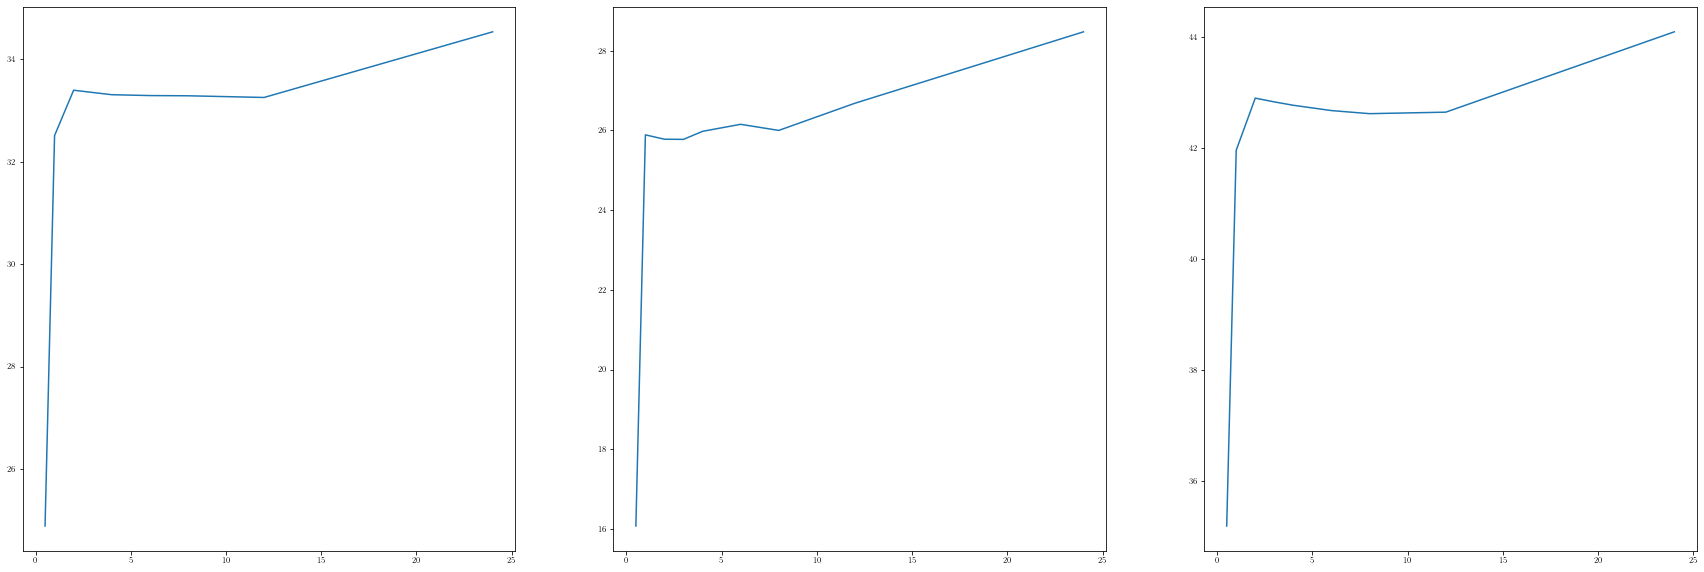

In [36]:
from sklearn.metrics import r2_score


whole_m_data_df = {}
for month in freq_month.keys():

    curr = {}

    abs_difference_list = list()
    diff_list = []
    for i in historic_wholesale_values.index:
        
        simulated_value = freq_month[month].loc[i.strftime("%Y-%m-%d")]['Primary Wholesale ($/MWh)']
        
        
        hist_value = historic_wholesale_values.loc[i]
        
        
        diff_list.append(simulated_value - hist_value)
        
        diff = abs(simulated_value - hist_value)
        abs_difference_list.append(diff)
        
        
        
    curr['mean_ae'] = np.mean(abs_difference_list)
    curr['median_ae'] = statistics.median(abs_difference_list)
    curr['rmse'] = (np.mean(list(map(lambda a: a**2, diff_list))))**0.5
    
        
    whole_m_data_df[month] = curr
        
# mad = statistics.median(abs_difference_list)
# std = mad*b
# print(f"Simulated results are {mad.round(decimals=2)} MTCO2-e (MAD) away from historic data")
# print(f"Simulated results have a standard deviation of {std.round(decimals=2)} MTCO2-e from historic data")

whole_m_data_df = pd.DataFrame(whole_m_data_df)
display(whole_m_data_df)

fig, ax = plt.subplots(1,3, figsize=(30,10))
for i,j in enumerate(whole_m_data_df.index):
    ax[i].plot(freqs, whole_m_data_df.loc[j])
plt.show()

In [37]:
# historicWholeMonth = historic_and_simul_wholesale_df['Volume Weighted Price (Historic) - $/MWh'].values

# withinSTD = ((historicWholeMonth < monthNominalWhole + monthWholeSTD) & (historicWholeMonth > monthNominalWhole - monthWholeSTD)).sum()
# withinSTDpercentage = (withinSTD/len(historicWholeMonth)) * 100.0
# print(f'{withinSTD} cases within the STD range out of {len(historicWholeMonth)}, which makes {withinSTDpercentage}% of total cases')


# within2STD = ((historicWholeMonth < monthNominalWhole + monthWhole2STD) & (historicWholeMonth > monthNominalWhole - monthWhole2STD)).sum()
# within2STDpercentage = (within2STD/len(historicWholeMonth)) * 100.0
# print(f'{within2STD} cases within the 2STD range out of {len(historicWholeMonth)}, which makes {within2STDpercentage}% of total cases')


In [38]:
# from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
# from EMAworkbench.ema_workbench.analysis.plotting_util import Density

# # fig, ax_env = multiple_densities(experiments, outcomes_filtered, outcomes_to_show = ooi,
# #                                  points_in_time=points_of_interest,  density = Density.HIST,
# #                                  grouping_specifiers=None , titles={ooi}, ylabels={ooi: "$/MWh"}, legend=True,
# #                                  fill=True, plot_type=PlotType.ENVELOPE)

# fig, ax_env = multiple_densities(experiments, outcomes_filtered_wholesale, outcomes_to_show = ooi,
#                                  points_in_time=points_of_interest_wholesale,  density = Density.HIST,
#                                  grouping_specifiers=None , titles={ooi}, ylabels={ooi: "$/MWh"}, legend=True,
#                                  fill=True, plot_type=PlotType.ENVELOPE)

# #Change x labels to years
# ax_env[ooi]['main plot'].set_xticklabels([startYear_wholesale + x / 10.0 for x in range(0,len(time_wholesale)*10,20)])
# #Add BAU in the plot with a red wide line
# ax_env[ooi]['main plot'].plot(outcomes_filtered_wholesale[ooi][-1], 'r-',linewidth=2 )
# ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][21709], 'y-')
# ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][48583], 'k-')
# ax_env[ooi]['main plot'].plot(outcomes_filtered[ooi][74035], 'm-')
 

# ax_env[ooi]['main plot'].plot(historic_wholesale_values, 'g--')


# fig[0].suptitle("{}".format(ooi), fontsize=15)
# fig[0].set_size_inches(18.5, 10.5)

# plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_3Regime_envelope_density_%s'%(ooi)),
#                 dpi=300, bbox_inches='tight')


### Tariffs

In [39]:
# #from startYear
# startYear_tariffs = 2001
# startYearShift_tariffs = (startYear_tariffs - 1998)

# #time = outcomes['TIMEYear'][0, startYearShift:]
# time_tariffs = outcomes['TIMEYear'][0, startYearShift_tariffs:-31]

# #points_of_interest = [*range(2020,2051,10)] 
# #points_of_interest = [ x - startYear for x in points_of_interest]

# points_of_interest_tariffs = [0,4,8,12]


# # Filter outcomes taking into account the startYear, and removing Seed Experiment info. 
# # Seed it is useful if I want to retrieve more info from the csv files, or redo the experiments with the
# # simulation parameters
# outcomes_filtered_tariffs = {k:v[:, startYearShift_tariffs:-31] for k,v in outcomes.items() if k != 'seedExperimentCsv'}

In [40]:
# # Subset Sool levers/uncertainties
# selected_uncertainties = uncertainties

# #selected_levers = levers
# ooi = 'tariffsYear'
# data = outcomes_filtered_tariffs[ooi]

# num_exp = len(data)
# out_avg_ooi = np.zeros(num_exp)

# for i in range(num_exp):
#     out_avg_ooi[i] = data[i].mean()

# exp = pd.DataFrame(experiments)

# exp = exp.loc[ :, selected_uncertainties] 

In [41]:
#change fig size
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

#compute STD and MEAN
# tariffsSTD = np.std(outcomes_filtered_tariffs['tariffsYear'],axis=0)
# tariffs2STD = 2*np.std(outcomes_filtered_tariffs['tariffsYear'],axis=0)


# tariffsMean = np.mean(outcomes_filtered_tariffs['tariffsYear'],axis=0)
# tariffsNominal = outcomes_filtered_tariffs[ooi][-1]
tariffsHistoricVinnies = yearly_historic_tariffs['St Vinnies Historic c/kWh (2019) '].values
tariffsHistoricReview = yearly_historic_tariffs['Historic price from review c/KWh (2019)'].values

#PLOT MEAN
#lineMean, = plt.plot(time_tariffs, tariffsMean, 'b-', label = 'Mean')

#PLOT STD and 2STD
# plt.fill_between(x=time_tariffs, y1=tariffsNominal - tariffsSTD, y2=tariffsNominal + tariffsSTD,
#                  color='gray', alpha=0.2,label='+/- 2\u03C3')
# plt.fill_between(x=time_tariffs, y1=tariffsNominal - tariffs2STD, y2=tariffsNominal + tariffs2STD,
#                  color='darkgray', alpha=0.2,label='+/- 1\u03C3')
#PLOT Historic

plt.plot(yearly_historic_tariffs.index, tariffsHistoricVinnies, 'g--', label = 'Historic St. Vinnies')
plt.plot(yearly_historic_tariffs.index, tariffsHistoricReview, 'b--', label = 'Historic Review')

for i in freq_year.keys():
    tariff_y_data = freq_year[i].loc[2001:2019]['Avg Tariff (c/KWh) per household']

    if i == 0.5:    
        plt.plot(tariff_y_data.index, tariff_y_data, label = f'Tariff - Hour {i}',color='red')
    else:
        plt.plot(tariff_y_data.index, tariff_y_data, label = f'Tariff - Hour {i}', alpha=0.4)



#PLOT Nominal
# lineNominal, = plt.plot(time_tariffs, tariffsNominal, 'r-', label = 'Nominal')

#PLOT legend, and title
plt.ylabel('$c/kWh$')
plt.legend()
plt.grid()
plt.xticks(range(2001,2020))
plt.show()
#plt.suptitle("{}".format(ooi), fontsize=15)

NameError: name 'figure' is not defined

In [42]:
yearly_historic_tariffs.dropna()

,St Vinnies Historic c/kWh (2019),Historic price from review c/KWh (2019)
Time (Year),,
2010,19.15,30.77
2011,19.82,31.72
2012,23.10,35.10
2013,23.67,40.17
2014,21.00,40.78
2015,19.86,35.76
2016,19.71,35.92
2017,21.28,37.61


In [43]:
#change fig size
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

#compute STD and MEAN
# tariffsSTD = np.std(outcomes_filtered_tariffs['tariffsYear'],axis=0)
# tariffs2STD = 2*np.std(outcomes_filtered_tariffs['tariffsYear'],axis=0)


# tariffsMean = np.mean(outcomes_filtered_tariffs['tariffsYear'],axis=0)
# tariffsNominal = outcomes_filtered_tariffs[ooi][-1]


tariffsAverageHistoric = yearly_historic_tariffs.mean(axis=1)

#PLOT MEAN
#lineMean, = plt.plot(time_tariffs, tariffsMean, 'b-', label = 'Mean')

#PLOT STD
# plt.fill_between(x=time_tariffs, y1=tariffsNominal - tariffsSTD, y2=tariffsNominal + tariffsSTD,
#                  color='gray', alpha=0.2)
# plt.fill_between(x=time_tariffs, y1=tariffsNominal - tariffs2STD, y2=tariffsNominal + tariffs2STD,
#                  color='darkgray', alpha=0.2)

#PLOT Historic
lineHist, = plt.plot(tariffsAverageHistoric.index, tariffsAverageHistoric, 'g--', label = 'Historic')

for i in freq_year.keys():
    tariff_y_data = freq_year[i].loc[2001:2019]['Avg Tariff (c/KWh) per household']

    if i == 0.5:    
        plt.plot(tariff_y_data.index, tariff_y_data, label = f'Tariff - Hour {i}', color='red')
    else:
        plt.plot(tariff_y_data.index, tariff_y_data, label = f'Tariff - Hour {i}', alpha=0.4)

#PLOT Nominal
# lineNominal, = plt.plot(time_tariffs, tariffsNominal, 'r-', label = 'Nominal')

# lightgrey_patch = mpatches.Patch(color='lightgray', label='+/- 2\u03C3')
# darkgrey_patch = mpatches.Patch(color='darkgray', label='+/- 1\u03C3')

#PLOT legend, and title
# plt.legend(handles=[lineHist,lineNominal,darkgrey_patch,lightgrey_patch])
plt.legend()
plt.ylabel('$c/kWh$')
plt.xticks(range(2001,2020))
plt.grid()
plt.show()

#plt.suptitle("{}".format(ooi), fontsize=15)

NameError: name 'figure' is not defined

### Summary Statistics

In [44]:
from sklearn.metrics import r2_score


tariff_data_df = {}
for year in freq_year.keys():

    curr = {}

    abs_difference_list = list()
    diff_list = []
    for i in tariffsAverageHistoric.index:

        simulated_value = freq_year[year].loc[i]['Avg Tariff (c/KWh) per household']
        
        
        hist_value = tariffsAverageHistoric.loc[i]
        
        
        diff_list.append(simulated_value - hist_value)
        
        diff = abs(simulated_value - hist_value)
        abs_difference_list.append(diff)
        
        

    curr['mean_ae'] = np.mean(np.array(abs_difference_list)[~np.isnan(abs_difference_list)])
    curr['median_ae'] = statistics.median(np.array(abs_difference_list)[~np.isnan(abs_difference_list)])
    curr['rmse'] = (np.mean(list(map(lambda a: a**2, np.array(abs_difference_list)[~np.isnan(abs_difference_list)]))))**0.5
    
        
    tariff_data_df[year] = curr
        
# mad = statistics.median(abs_difference_list)
# std = mad*b
# print(f"Simulated results are {mad.round(decimals=2)} MTCO2-e (MAD) away from historic data")
# print(f"Simulated results have a standard deviation of {std.round(decimals=2)} MTCO2-e from historic data")

tariff_data_df = pd.DataFrame(tariff_data_df)
display(tariff_data_df)

fig, ax = plt.subplots(1,3, figsize=(30,10))
for i,j in enumerate(tariff_data_df.index):
    ax[i].plot(freqs, tariff_data_df.loc[j])
plt.show()


NameError: name 'tariffsAverageHistoric' is not defined

In [45]:
# withinSTD = ((tariffsAverageHistoric < tariffsNominal + tariffsSTD) & (tariffsAverageHistoric > tariffsNominal - tariffsSTD)).sum()
# numCases = np.sum(tariffsAverageHistoric.count())
# withinSTDpercentage = (withinSTD/numCases) * 100.0
# print(f'{withinSTD} cases within the STD range out of {numCases}, which makes {withinSTDpercentage}% of total cases')

# within2STD = ((tariffsAverageHistoric < tariffsNominal + tariffs2STD) & (tariffsAverageHistoric > tariffsNominal - tariffs2STD)).sum()
# numCases = np.sum(tariffsAverageHistoric.count())
# within2STDpercentage = (within2STD/numCases) * 100.0
# print(f'{within2STD} cases within the 2STD range out of {numCases}, which makes {within2STDpercentage}% of total cases')


#### Best seeds according to statistics  MAD, RMSE, Euclidian distance

In [46]:
# b = 1.4826

# abs_difference_list = list()

# abs_difference_list = abs(tariffsAverageHistoric.values - tariffsNominal)

# mad = np.median(abs_difference_list[~np.isnan(abs_difference_list)])
# print(f'The MAD of Nominal {mad:.2f}')

# #Root-mean square error
# squareTariffs = np.square(tariffsAverageHistoric.values - tariffsNominal)
# rms = np.sqrt(np.mean(squareTariffs[~np.isnan(squareTariffs)],axis=0))
# print(f'The RMS of Nominal {rms:.2f}')


In [47]:
# from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
# from EMAworkbench.ema_workbench.analysis.plotting_util import Density

# fig, ax_env = multiple_densities(experiments, outcomes_filtered_tariffs, outcomes_to_show = ooi,
#                                  points_in_time=points_of_interest_tariffs,  density = Density.HIST,
#                                  grouping_specifiers=None , titles={ooi}, ylabels={ooi: "c/KWh"}, legend=True,
#                                  fill=True, plot_type=PlotType.ENVELOPE)

# #Change x labels to years
# ax_env[ooi]['main plot'].set_xticklabels([startYear_tariffs + x / 10.0 for x in range(0,len(time_tariffs)*10,20)])
# #Add BAU in the plot with a red wide line
# ax_env[ooi]['main plot'].plot(outcomes_filtered_tariffs[ooi][-1], 'r:',linewidth=2 )

# ax_env[ooi]['main plot'].plot(yearly_historic_tariffs['St Vinnies Historic c/kWh (2019) '].values, 'k--')
# ax_env[ooi]['main plot'].plot(yearly_historic_tariffs['Historic price from review c/KWh (2019)'].values, 'k--')

# fig[0].suptitle("{}".format(ooi), fontsize=15)
# fig[0].set_size_inches(18.5, 10.5)

# plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_3Regime_envelope_density_%s'%(ooi)),
#                 dpi=300, bbox_inches='tight')


## Renewable energy in the System

In [48]:
## Historic renewables in the system (from OpenNem data)

In [49]:
# #from startYear
# startYear_re = 2005
# startYearShift_re = (startYear_re - 1998)

# #time = outcomes['TIMEYear'][0, startYearShift:]
# time_re = outcomes['TIMEYear'][0, startYearShift_re:-30]

# #points_of_interest = [*range(2020,2051,10)] 
# #points_of_interest = [ x - startYear for x in points_of_interest]

# points_of_interest_re = [0,5,10,15]


# # Filter outcomes taking into account the startYear, and removing Seed Experiment info. 
# # Seed it is useful if I want to retrieve more info from the csv files, or redo the experiments with the
# # simulation parameters
# outcomes_filtered_re = {k:v[:, startYearShift_re:-30] for k,v in outcomes.items() if k != 'seedExperimentCsv'}

In [50]:
ooi = 'renewableContributionYear'

In [51]:
## Energy Production per month per technology
histSolarRooftop = historic_wholesale_df['Solar (Rooftop) - GWh'].resample('YS').mean().values
histSolarUtility = historic_wholesale_df['Solar (Utility) - GWh'].resample('YS').mean().values
histWind = historic_wholesale_df['Wind - GWh'].resample('YS').mean().values
histHydro = historic_wholesale_df['Hydro - GWh'].resample('YS').mean().values
histBatt = historic_wholesale_df['Battery (Discharging) - GWh'].resample('YS').mean().values
histGasOcgt = historic_wholesale_df['Gas (OCGT) - GWh'].resample('YS').mean().values
histGasCcgt = historic_wholesale_df['Gas (Steam) - GWh'].resample('YS').mean().values
histBC = historic_wholesale_df['Brown Coal - GWh'].resample('YS').mean().values
histImport = historic_wholesale_df['Imports - GWh'].resample('YS').mean().values
histExport = historic_wholesale_df['Exports - GWh'].resample('YS').mean().values

allProduction = histSolarRooftop + histSolarUtility + histWind + histHydro + histBatt + histGasCcgt + histGasOcgt + histBC

histRenewableProductionPerc = ((histSolarRooftop+histSolarUtility+histHydro+histWind) / allProduction) 

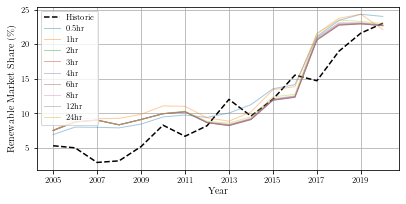

In [55]:

# plt.rcParams['text.usetex'] = True
# import matplotlib
# matplotlib.rcParams['mathtext.fontset'] = 'stix'
# matplotlib.rcParams['font.family'] = 'STIXGeneral'
#change fig size
# figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

#compute STD and MEAN
# reSTD = np.std(outcomes_filtered_re['renewableContributionYear'],axis=0)
# re2STD = 2*np.std(outcomes_filtered_re['renewableContributionYear'],axis=0)

# reMean = np.mean(outcomes_filtered_re['renewableContributionYear'],axis=0)
# reNominal = outcomes_filtered_re[ooi][-1]

# plt.figure(figsize=(6.5,3))

fig, ax = plt.subplots(1, 1, figsize=(6.5, 3))

reHistoric = histRenewableProductionPerc

#PLOT MEAN
#lineMean, = plt.plot(time_re,reMean, 'b-', label = 'Mean')

#PLOT STD
# plt.fill_between(x=time_re,y1=reNominal - reSTD, y2=reNominal + reSTD,
#                  color='gray', alpha=0.2)
# plt.fill_between(x=time_re,y1=reNominal - re2STD, y2=reNominal + re2STD,
#                  color='darkgray', alpha=0.2)

#PLOT Historic
time_re = range(2005, 2021)
lineHist, = ax.plot(time_re,reHistoric*100, linestyle='--', label = 'Historic', color='black')



for i in freq_year.keys():
    renew_y_data = freq_year[i].loc[2005:2020]['Percentage Renewable Production']

    if i == 0.5:    
        ax.plot(renew_y_data.index, renew_y_data*100, label = f'{i}hr', alpha=0.4, linewidth=1)
    else:
        ax.plot(renew_y_data.index, renew_y_data*100,  label = f'{i}hr', alpha=0.4, linewidth=1)

#PLOT Nominal
# lineNominal, = plt.plot(time_re,reNominal, 'r-', label = 'Nominal')


# lightgrey_patch = mpatches.Patch(color='lightgray', label='+/- 2\u03C3')
# darkgrey_patch = mpatches.Patch(color='darkgray', label='+/- 1\u03C3')

#PLOT legend, and title
# plt.legend(handles=[lineHist,lineNominal,darkgrey_patch,lightgrey_patch], loc = 'upper left')
ax.legend(loc = 'upper left')
ax.grid()
ax.set_xlabel('Year')
ax.set_ylabel('Renewable Market Share (\%)')
ax.set_xticks(renew_y_data.index[::2])
ax.grid()
plt.grid()
# plt.legend(prop={'size':8})
plt.savefig("results/AllCombined_renew.pdf", facecolor='white', transparent=False,  bbox_inches='tight', dpi=600)
plt.show()
#plt.suptitle("{}".format(ooi), fontsize=15)

In [53]:
renews = {'Historic':reHistoric*100}
for i in freq_year:
    renews[i] = freq_year[i].loc[2005:2020]['Percentage Renewable Production'] * 100

In [54]:
print(pd.DataFrame(renews).round(2).to_latex())

\begin{tabular}{lrrrrrrrrrr}
\toprule
{} &  Historic &    0.5 &      1 &      2 &      3 &      4 &      6 &      8 &     12 &     24 \\
Time (Year) &           &        &        &        &        &        &        &        &        &        \\
\midrule
2005        &      5.33 &   6.95 &   7.54 &   7.53 &   7.53 &   7.53 &   7.53 &   7.53 &   7.53 &   7.52 \\
2006        &      5.03 &   8.02 &   9.22 &   8.77 &   8.77 &   8.77 &   8.77 &   8.77 &   8.77 &   8.76 \\
2007        &      2.92 &   7.99 &   9.24 &   9.04 &   9.04 &   9.03 &   9.03 &   9.03 &   9.03 &   9.02 \\
2008        &      3.15 &   7.91 &   9.28 &   8.35 &   8.35 &   8.35 &   8.35 &   8.35 &   8.35 &   8.34 \\
2009        &      5.21 &   8.45 &   9.86 &   9.12 &   9.12 &   9.12 &   9.12 &   9.12 &   9.12 &   9.11 \\
2010        &      8.30 &   9.49 &  11.09 &   9.95 &   9.95 &   9.95 &   9.96 &   9.96 &   9.96 &   9.98 \\
2011        &      6.70 &   9.76 &  11.02 &  10.22 &  10.22 &  10.23 &  10.24 &  10.25 &  10.27 & 

### Summary Statistics

,0.5,1.0,2.0,3.0,4.0,6.0,8.0,12.0,24.0
mean_ae,0.027646,0.033619,0.028610,0.028618,0.028626,0.028642,0.028658,0.028774,0.029209
median_ae,0.023500,0.029687,0.033630,0.033557,0.033485,0.033340,0.033195,0.032906,0.031014
rmse,0.031908,0.038891,0.034383,0.034432,0.034482,0.034584,0.034690,0.034911,0.035651


\begin{tabular}{lrrrrrrrrr}
\hline
{} &  \textbf{0.5hr} &  \textbf{1hr} &  \textbf{2hr} &  \textbf{3hr} &  \textbf{4hr} &  \textbf{6hr} &  \textbf{8hr} &  \textbf{12hr} &  \textbf{24hr} \\
\hline
\textbf{MAE}  &            2.76 &          3.36 &          2.86 &          2.86 &          2.86 &          2.86 &          2.87 &           2.88 &           2.92 \\
\textbf{RMSE} &            3.19 &          3.89 &          3.44 &          3.44 &          3.45 &          3.46 &          3.47 &           3.49 &           3.57 \\
\hline
\end{tabular}



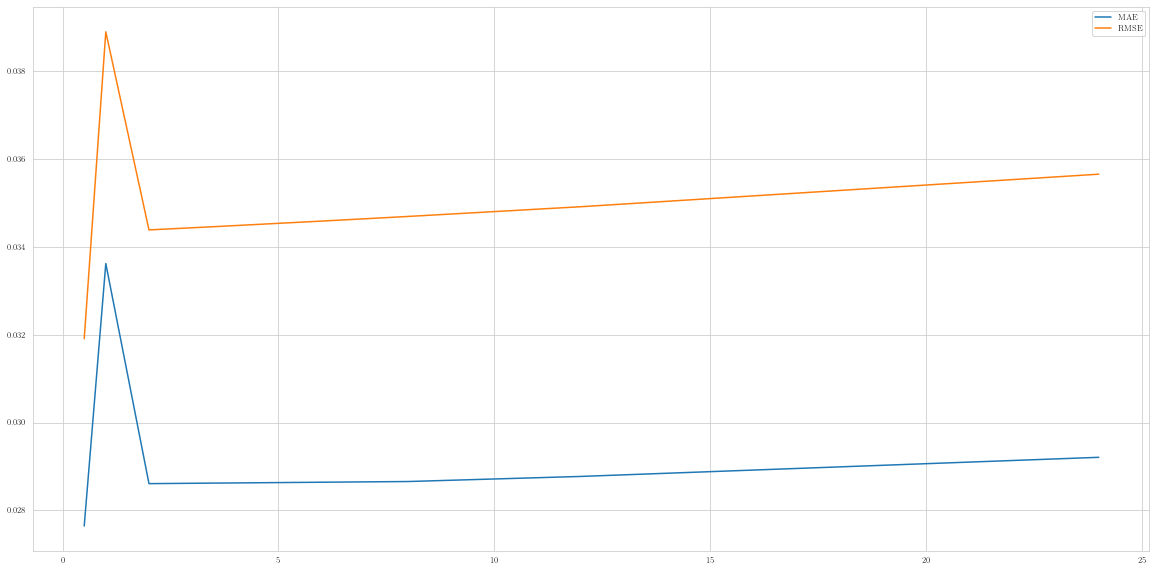

In [53]:
from sklearn.metrics import r2_score


renew_data_df = {}
for year in freq_year.keys():

    curr = {}

    abs_difference_list = list()
    diff_list = []
    for i in range(2005,2021):

        simulated_value = freq_year[year].loc[i]['Percentage Renewable Production']
        
        
        hist_value = reHistoric[i-2005]
        
        
        diff_list.append(simulated_value - hist_value)
        
        diff = abs(simulated_value - hist_value)
        abs_difference_list.append(diff)
        
        

    curr['mean_ae'] = np.mean(np.array(abs_difference_list)[~np.isnan(abs_difference_list)])
    curr['median_ae'] = statistics.median(np.array(abs_difference_list)[~np.isnan(abs_difference_list)])
    curr['rmse'] = (np.mean(list(map(lambda a: a**2, np.array(abs_difference_list)[~np.isnan(abs_difference_list)]))))**0.5
    
        
    renew_data_df[year] = curr
        
# mad = statistics.median(abs_difference_list)
# std = mad*b
# print(f"Simulated results are {mad.round(decimals=2)} MTCO2-e (MAD) away from historic data")
# print(f"Simulated results have a standard deviation of {std.round(decimals=2)} MTCO2-e from historic data")

renew_data_df = pd.DataFrame(renew_data_df)
display(renew_data_df)
temp_df = renew_data_df.copy() * 100
back = "\\"
temp_df.columns = [f"{back}textbf{{{i}hr}}" for i in freq_year.keys()]
temp_df.index = [f"{back}textbf{{MAE}}", '_', f"{back}textbf{{RMSE}}"]
print(temp_df.loc[[f"{back}textbf{{MAE}}", f"{back}textbf{{RMSE}}"]].round(2).to_latex().replace("textbackslash ","").replace("\\{","{").replace("\\}","}").replace("toprule", 'hline').replace('midrule','hline').replace('bottomrule','hline'))


# fig, ax = plt.subplots(1,3, figsize=(30,10))
# for i,j in enumerate(renew_data_df.index):
#     ax[i].plot(freqs, renew_data_df.loc[j])

# plt.savefig("results/stats_renew")
# plt.show()

fig = plt.figure(figsize=(20,10))
plt.plot(freqs, renew_data_df.loc['mean_ae'], label = 'MAE')
plt.plot(freqs, renew_data_df.loc['rmse'], label = 'RMSE')
plt.legend()
plt.savefig(f"results/stats_renew")
plt.show()





In [43]:
# withinSTD = ((histRenewableProductionPerc < reNominal + reSTD) & (histRenewableProductionPerc > reNominal - reSTD)).sum()
# numCases = len(histRenewableProductionPerc)
# withinSTDpercentage = (withinSTD/numCases) * 100.0
# print(f'{withinSTD} cases within the STD range out of {numCases}, which makes {withinSTDpercentage}% of total cases')

# within2STD = ((histRenewableProductionPerc < reNominal + re2STD) & (histRenewableProductionPerc > reNominal - re2STD)).sum()
# numCases = len(histRenewableProductionPerc)
# within2STDpercentage = (within2STD/numCases) * 100.0
# print(f'{within2STD} cases within the 2STD range out of {numCases}, which makes {within2STDpercentage}% of total cases')

In [44]:
# b = 1.4826

# abs_difference_list = list()

# abs_difference_list = abs(histRenewableProductionPerc - reNominal)

# mad = np.median(abs_difference_list[~np.isnan(abs_difference_list)])
# print(f'The MAD of Nominal {mad:.2f}')

# #Root-mean square error
# squareTariffs = np.square(histRenewableProductionPerc - reNominal)
# rms = np.sqrt(np.mean(squareTariffs[~np.isnan(squareTariffs)],axis=0))
# print(f'The RMS of Nominal {rms:.2f}')


In [36]:
runtime_df = pd.read_csv("../../runtimes.csv", index_col=0)

In [37]:

runtime_df = pd.read_csv("../../runtimes.csv", index_col=0)

a = []
for i in runtime_df:
    for j in runtime_df[i]:
        a.append([i, j])
        
runtime_df = pd.DataFrame(a, columns=['Freq','Time'])
runtime_df['Freq'] = pd.to_numeric(runtime_df['Freq'])

In [46]:
print(runtime_df.groupby(by='Freq').mean().sort_values(by='Freq').transpose().round(2).to_latex())

\begin{tabular}{lrrrrrrrrr}
\toprule
Freq &   0.5  &   1.0  &   2.0  &   3.0  &  4.0  &  6.0  &  8.0  &  12.0 &  24.0 \\
\midrule
Time &  77.04 &  29.23 &  15.95 &  12.39 &  10.9 &  9.19 &  7.67 &   6.4 &  4.86 \\
\bottomrule
\end{tabular}



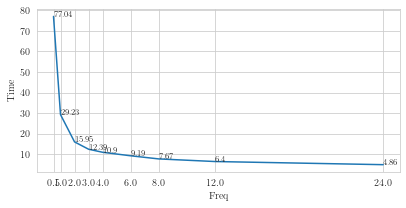

In [41]:
import seaborn as sns
# fig = plt.figure(figsize = (30,10))
# sns.boxplot(x='Freq', y='Time', data=runtime_df)
fig = plt.figure(figsize = (6.5,3))
sns.lineplot(x='Freq', y='Time', data = runtime_df.groupby(by='Freq').mean().sort_values(by='Freq'))

for i in runtime_df.groupby(by='Freq').mean().sort_values(by='Freq').iterrows():
    plt.text(i[0],i[1],str(i[1][0].round(2)), fontsize=8)
    

plt.grid()
plt.xticks(sorted(list(set(list(runtime_df['Freq'])))))
plt.grid()


plt.savefig("results/runtime")

plt.show()

In [59]:
comp_df = pd.read_csv("../../runtime java-vs-python.csv", index_col=0)
display(comp_df.mean())
vals = []
for i in comp_df:
    vals += [(i,j) for j in comp_df[i]]
comp_df = pd.DataFrame(vals, columns=['Language','Time'])

Java       77.040077
Python    134.060521
dtype: float64

In [60]:
comp_df.Time = pd.to_numeric(comp_df.Time)

In [61]:
comp_df.groupby(by='Language').describe()['Time']

,count,mean,std,min,25%,50%,75%,max
Language,,,,,,,,
Java,10.0,77.040077,3.083343,74.066493,74.480034,76.738528,78.179593,83.640709
Python,10.0,134.060521,3.854372,128.887245,131.059435,133.311326,136.468109,139.916631


In [62]:
print(comp_df.groupby(by='Language').describe()['Time'][['mean', 'std', 'min', 'max']].round(2).to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &    mean &   std &     min &     max \\
Language &         &       &         &         \\
\midrule
Java     &   77.04 &  3.08 &   74.07 &   83.64 \\
Python   &  134.06 &  3.85 &  128.89 &  139.92 \\
\bottomrule
\end{tabular}



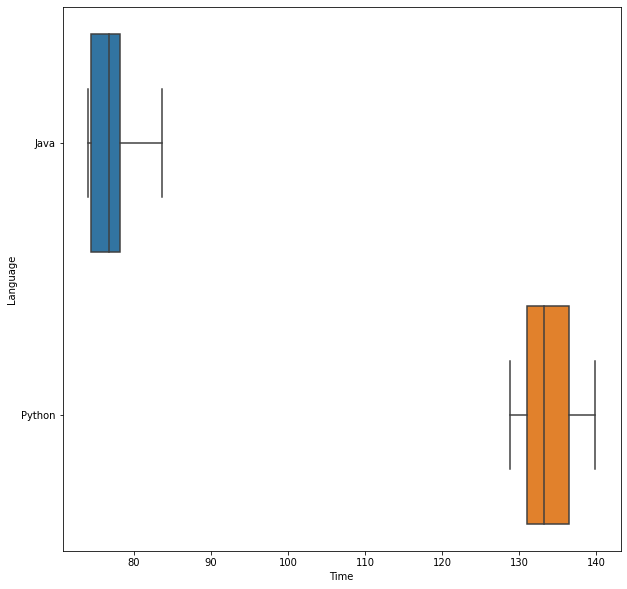

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,10))

sns.boxplot(x='Time', y='Language', data=comp_df, orient='h')
plt.savefig("results/language_comp")